In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('SampleData.csv')
file_path = 'Sample Data.xlsx'

xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Google Raw', 'Facebook Raw']


In [3]:
df_google = pd.read_excel(file_path, sheet_name='Google Raw')
df_facebook = pd.read_excel(file_path, sheet_name='Facebook Raw')

print(df_google.head())
print(df_facebook.head())


        Date Campaign Name Ad Set Name  Cost (INR)  Impressions  \
0 2024-04-01    Campaign A    Ad Set 1     2330.33        18714   
1 2024-04-02    Campaign A    Ad Set 1     2095.18        19795   
2 2024-04-03    Campaign A    Ad Set 1     2333.82        18258   
3 2024-04-04    Campaign A    Ad Set 1     2487.05        22554   
4 2024-04-05    Campaign A    Ad Set 1     1841.06        19872   

   Clicks (Traffic)       CTR  CPC (INR)  Leads  CPL (INR)  Traffic to Lead  \
0              1061  0.056696   2.196352     51  45.692745         0.048068   
1              1156  0.058399   1.812439     51  41.081961         0.044118   
2              1082  0.059262   2.156950     57  40.944211         0.052680   
3              1002  0.044427   2.482086     60  41.450833         0.059880   
4              1078  0.054247   1.707848     54  34.093704         0.050093   

   Call   Lead to Call  Type of Call (Online)  Type of Call (Offline)  \
0     27      0.529412                     17    

In [4]:
df_google_cleaned = df_google.dropna()
df_facebook_cleaned = df_facebook.fillna(0)


In [5]:
with pd.ExcelWriter('cleaned_file.xlsx') as writer:
    df_google_cleaned.to_excel(writer, sheet_name='Google Raw', index=False)
    df_facebook_cleaned.to_excel(writer, sheet_name='Facebook Raw', index=False)

In [ ]:
# now data is cleaned and data donot have any null value

In [6]:
df_google.columns = df_google.columns.str.strip().str.lower().str.replace(' ', '_')
df_facebook.columns = df_facebook.columns.str.strip().str.lower().str.replace(' ', '_')


here we merged  / concat both sheets


In [7]:
combined_df = pd.concat([df_google, df_facebook], ignore_index=True)


In [8]:
combined_df = pd.concat([df_google, df_facebook], ignore_index=True)

#Convert the date column to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'])

all_dates = pd.date_range(start=combined_df['date'].min(), end=combined_df['date'].max())


In [13]:

campaigns = combined_df['campaign_name'].unique()
ad_sets = combined_df['ad_set_name'].unique()

index = pd.MultiIndex.from_product([all_dates, campaigns, ad_sets], names=['date', 'campaign_name', 'ad_set_name'])
full_df = pd.DataFrame(index=index).reset_index()

# Merge
aligned_df = full_df.merge(combined_df, on=['date', 'campaign_name', 'ad_set_name'], how='left')


# Fill missing values
aligned_df.fillna(method='ffill', inplace=True)
aligned_df.fillna(method='bfill', inplace=True)
print("Aligned DataFrame (after cleaning):")
print(aligned_df.head())
cleaned_file_path = 'level_2_cleaned_file.xlsx'

with pd.ExcelWriter(cleaned_file_path) as writer:
    aligned_df.to_excel(writer, sheet_name='AlignedData', index=False)

print(f"Data cleaning complete and saved to {cleaned_file_path}.")


Aligned DataFrame (after cleaning):
        date campaign_name ad_set_name  cost_(inr)  impressions  \
0 2024-04-01    Campaign A    Ad Set 1     2330.33      18714.0   
1 2024-04-01    Campaign A    Ad Set 2     2297.42      21092.0   
2 2024-04-01    Campaign A    Ad Set 3     2007.78      22655.0   
3 2024-04-01    Campaign A    Ad Set 5     2007.78      22655.0   
4 2024-04-01    Campaign A    Ad Set 6     2007.78      22655.0   

   clicks_(traffic)       ctr  cpc_(inr)  leads  cpl_(inr)  traffic_to_lead  \
0            1061.0  0.056696   2.196352   51.0  45.692745         0.048068   
1            1153.0  0.054665   1.992559   60.0  38.290333         0.052038   
2             918.0  0.040521   2.187124   59.0  34.030169         0.064270   
3             918.0  0.040521   2.187124   59.0  34.030169         0.064270   
4             918.0  0.040521   2.187124   59.0  34.030169         0.064270   

   call  lead_to_call  type_of_call_(online)  type_of_call_(offline)  \
0  27.0      0

**Task 2**

In [15]:

industry_benchmarks_google = {
    'ctr_min': 0.08,
    'ctr_max': 0.10,
    'traffic_to_lead_min': 0.07,
    'traffic_to_lead_max': 0.08,
    'lead_to_call_min': 0.25,
    'lead_to_call_max': 0.30
}

industry_benchmarks_facebook = {
    'ctr_min': 0.02,
    'ctr_max': 0.03,
    'traffic_to_lead_min': 0.12,
    'traffic_to_lead_max': 0.15,
    'lead_to_call_min': 0.12,
    'lead_to_call_max': 0.15
}

revenue_per_call = {
    'offline': 2000,
    'online': 1200
}

offline_consultation_capacity = 100


Summary of Key Metrics:
        campaign_name ad_set_name  cost_(inr)  impressions  clicks_(traffic)  \
0          Campaign A    Ad Set 1    64659.48     604974.0           31208.0   
1          Campaign A    Ad Set 2    63755.39     613957.0           31262.0   
2          Campaign A    Ad Set 3    63291.58     625744.0           31184.0   
3          Campaign A    Ad Set 5    63291.58     625744.0           31184.0   
4          Campaign A    Ad Set 6    63291.58     625744.0           31184.0   
5          Campaign A    Ad Set 7    63291.58     625744.0           31184.0   
6          Campaign B    Ad Set 1    64314.65     604458.0           31585.0   
7          Campaign B    Ad Set 2    65108.43     622244.0           32130.0   
8          Campaign B    Ad Set 3    63326.82     609288.0           31947.0   
9          Campaign B    Ad Set 5    63326.82     609288.0           31947.0   
10         Campaign B    Ad Set 6    63326.82     609288.0           31947.0   
11         Campa

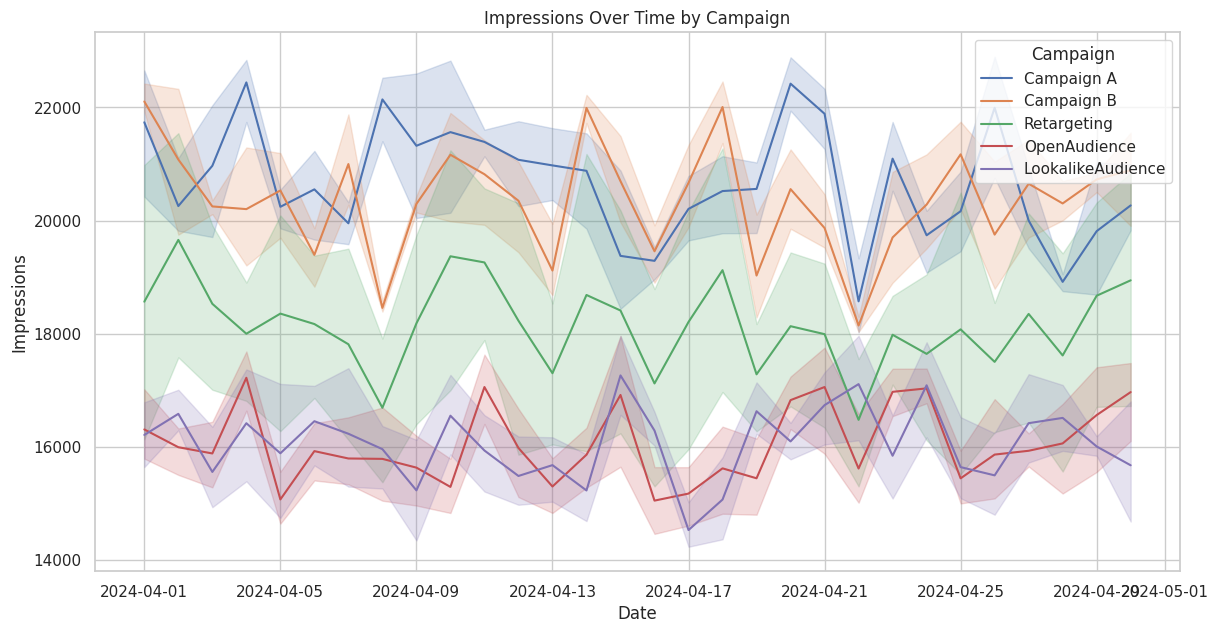

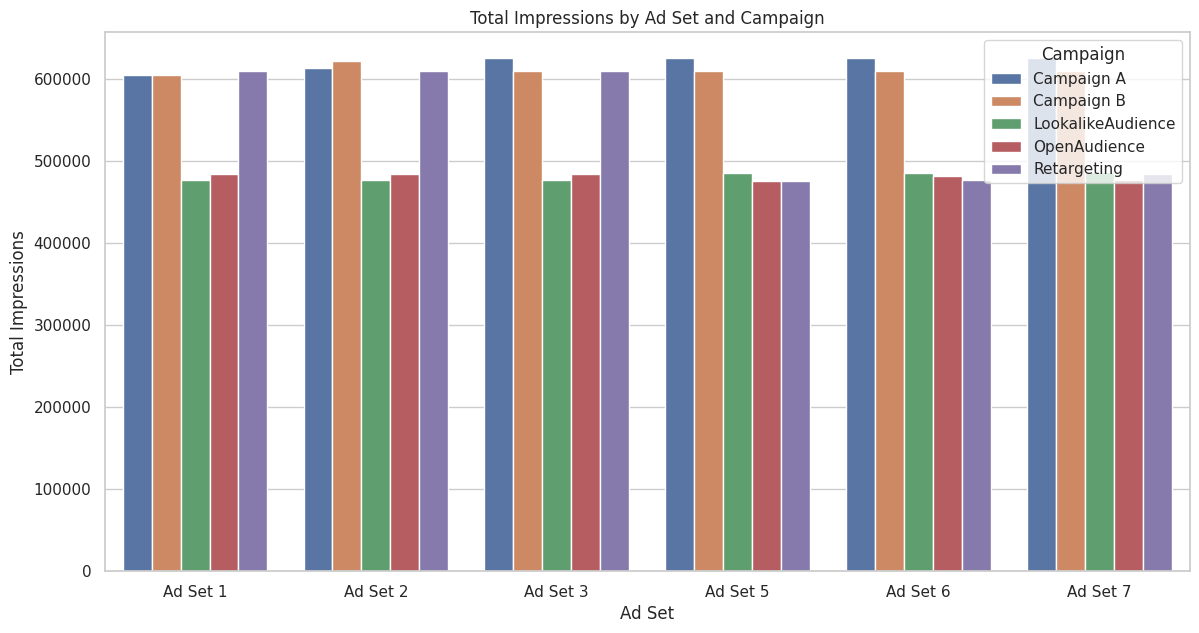

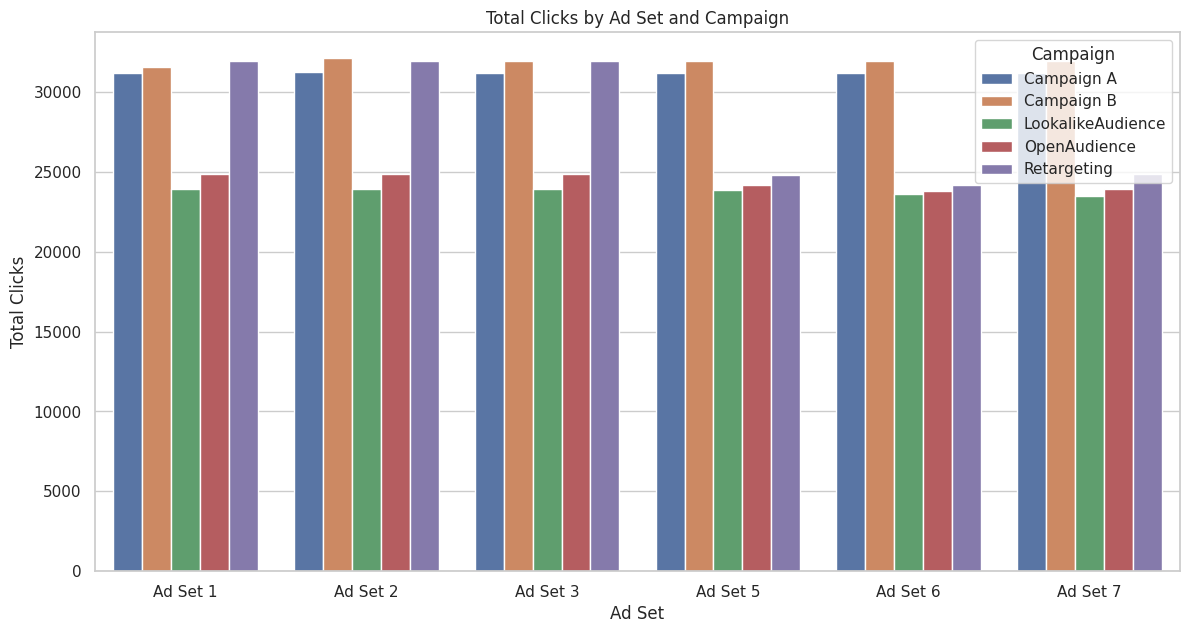

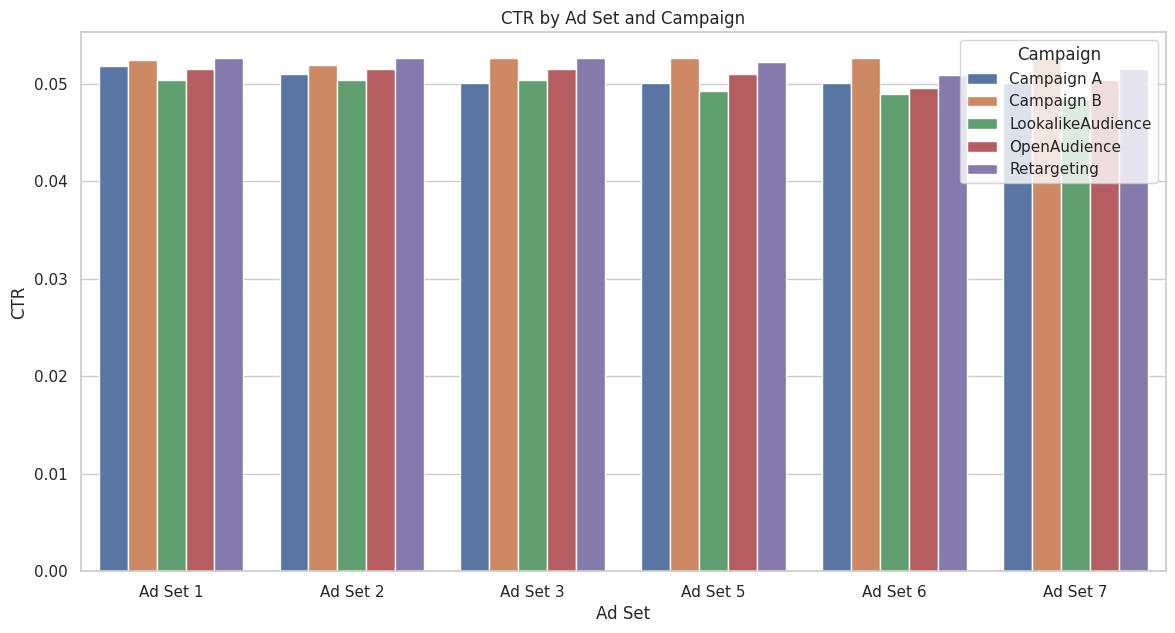

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is datetime
aligned_df['date'] = pd.to_datetime(aligned_df['date'])

# Summarize key metrics for each campaign and ad set
summary = aligned_df.groupby(['campaign_name', 'ad_set_name']).agg({
    'cost_(inr)': 'sum',
    'impressions': 'sum',
    'clicks_(traffic)': 'sum',
    'ctr': 'mean',  # Average CTR
    'cpc_(inr)': 'mean',  # Average CPC
    'leads': 'sum',
    'cpl_(inr)': 'mean',  # Average CPL
    'traffic_to_lead': 'mean',  # Average Traffic to Lead Ratio
    'call': 'sum',
    'lead_to_call': 'mean',  # Average Lead to Call Ratio
    'type_of_call_(online)': 'sum',
    'type_of_call_(offline)': 'sum',
    'cac': 'mean',  # Average CAC
    'call_(conversion)': 'sum'
}).reset_index()

print("Summary of Key Metrics:")
print(summary)

# Visualization
sns.set(style="whitegrid")

# Line graph for trends over time (e.g., impressions over time for each campaign)
plt.figure(figsize=(14, 7))
sns.lineplot(data=aligned_df, x='date', y='impressions', hue='campaign_name')
plt.title('Impressions Over Time by Campaign')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.legend(title='Campaign')
plt.show()

# Bar chart for comparison of total impressions, clicks, and CTR across ad sets
plt.figure(figsize=(14, 7))
sns.barplot(data=summary, x='ad_set_name', y='impressions', hue='campaign_name')
plt.title('Total Impressions by Ad Set and Campaign')
plt.xlabel('Ad Set')
plt.ylabel('Total Impressions')
plt.legend(title='Campaign')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=summary, x='ad_set_name', y='clicks_(traffic)', hue='campaign_name')
plt.title('Total Clicks by Ad Set and Campaign')
plt.xlabel('Ad Set')
plt.ylabel('Total Clicks')
plt.legend(title='Campaign')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=summary, x='ad_set_name', y='ctr', hue='campaign_name')
plt.title('CTR by Ad Set and Campaign')
plt.xlabel('Ad Set')
plt.ylabel('CTR')
plt.legend(title='Campaign')
plt.show()


In [16]:
def calculate_performance_diff_google(df):
    df['ctr_diff'] = df['ctr'].apply(lambda x: x - industry_benchmarks_google['ctr_min'] if x < industry_benchmarks_google['ctr_min'] else (x - industry_benchmarks_google['ctr_max'] if x > industry_benchmarks_google['ctr_max'] else 0))
    df['traffic_to_lead_diff'] = df['traffic_to_lead'].apply(lambda x: x - industry_benchmarks_google['traffic_to_lead_min'] if x < industry_benchmarks_google['traffic_to_lead_min'] else (x - industry_benchmarks_google['traffic_to_lead_max'] if x > industry_benchmarks_google['traffic_to_lead_max'] else 0))
    df['lead_to_call_diff'] = df['lead_to_call'].apply(lambda x: x - industry_benchmarks_google['lead_to_call_min'] if x < industry_benchmarks_google['lead_to_call_min'] else (x - industry_benchmarks_google['lead_to_call_max'] if x > industry_benchmarks_google['lead_to_call_max'] else 0))
    return df

def calculate_performance_diff_facebook(df):
    df['ctr_diff'] = df['ctr'].apply(lambda x: x - industry_benchmarks_facebook['ctr_min'] if x < industry_benchmarks_facebook['ctr_min'] else (x - industry_benchmarks_facebook['ctr_max'] if x > industry_benchmarks_facebook['ctr_max'] else 0))
    df['traffic_to_lead_diff'] = df['traffic_to_lead'].apply(lambda x: x - industry_benchmarks_facebook['traffic_to_lead_min'] if x < industry_benchmarks_facebook['traffic_to_lead_min'] else (x - industry_benchmarks_facebook['traffic_to_lead_max'] if x > industry_benchmarks_facebook['traffic_to_lead_max'] else 0))
    df['lead_to_call_diff'] = df['lead_to_call'].apply(lambda x: x - industry_benchmarks_facebook['lead_to_call_min'] if x < industry_benchmarks_facebook['lead_to_call_min'] else (x - industry_benchmarks_facebook['lead_to_call_max'] if x > industry_benchmarks_facebook['lead_to_call_max'] else 0))
    return df


In [17]:
google_ads_campaigns = ['Campaign A', 'Campaign B']
facebook_ads_campaigns = ['Retargeting', 'OpenAudience', 'LookalikeAudience']
google_ads_df = aligned_df[aligned_df['campaign_name'].isin(google_ads_campaigns)]
facebook_ads_df = aligned_df[aligned_df['campaign_name'].isin(facebook_ads_campaigns)]


google_comparison_df = calculate_performance_diff_google(google_ads_df)
facebook_comparison_df = calculate_performance_diff_facebook(facebook_ads_df)

comparison_df = pd.concat([google_comparison_df, facebook_comparison_df], ignore_index=True)

print(comparison_df)


          date      campaign_name ad_set_name  cost_(inr)  impressions  \
0   2024-04-01         Campaign A    Ad Set 1     2330.33      18714.0   
1   2024-04-01         Campaign A    Ad Set 2     2297.42      21092.0   
2   2024-04-01         Campaign A    Ad Set 3     2007.78      22655.0   
3   2024-04-01         Campaign A    Ad Set 5     2007.78      22655.0   
4   2024-04-01         Campaign A    Ad Set 6     2007.78      22655.0   
..         ...                ...         ...         ...          ...   
895 2024-04-30  LookalikeAudience    Ad Set 2     1986.59      14885.0   
896 2024-04-30  LookalikeAudience    Ad Set 3     1986.59      14885.0   
897 2024-04-30  LookalikeAudience    Ad Set 5     1609.39      17151.0   
898 2024-04-30  LookalikeAudience    Ad Set 6     1503.99      17958.0   
899 2024-04-30  LookalikeAudience    Ad Set 7     1973.63      14249.0   

     clicks_(traffic)       ctr  cpc_(inr)  leads  cpl_(inr)  traffic_to_lead  \
0              1061.0  0.05669

<ipython-input-16-345f31b9975e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ctr_diff'] = df['ctr'].apply(lambda x: x - industry_benchmarks_google['ctr_min'] if x < industry_benchmarks_google['ctr_min'] else (x - industry_benchmarks_google['ctr_max'] if x > industry_benchmarks_google['ctr_max'] else 0))
<ipython-input-16-345f31b9975e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_to_lead_diff'] = df['traffic_to_lead'].apply(lambda x: x - industry_benchmarks_google['traffic_to_lead_min

In [21]:
summary_comparison = comparison_df[['campaign_name', 'ad_set_name', 'ctr_diff', 'traffic_to_lead_diff', 'lead_to_call_diff']]

print("Summary Comparison with Industry Benchmarks:")
print(summary_comparison)


Summary Comparison with Industry Benchmarks:
         campaign_name ad_set_name  ctr_diff  traffic_to_lead_diff  \
0           Campaign A    Ad Set 1 -0.023304             -0.021932   
1           Campaign A    Ad Set 2 -0.025335             -0.017962   
2           Campaign A    Ad Set 3 -0.039479             -0.005730   
3           Campaign A    Ad Set 5 -0.039479             -0.005730   
4           Campaign A    Ad Set 6 -0.039479             -0.005730   
..                 ...         ...       ...                   ...   
895  LookalikeAudience    Ad Set 2  0.017430             -0.047762   
896  LookalikeAudience    Ad Set 3  0.017430             -0.047762   
897  LookalikeAudience    Ad Set 5  0.018277             -0.054783   
898  LookalikeAudience    Ad Set 6  0.009258             -0.047660   
899  LookalikeAudience    Ad Set 7  0.021021             -0.056726   

     lead_to_call_diff  
0             0.229412  
1             0.183333  
2             0.276271  
3             

In [22]:
#now visulaization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



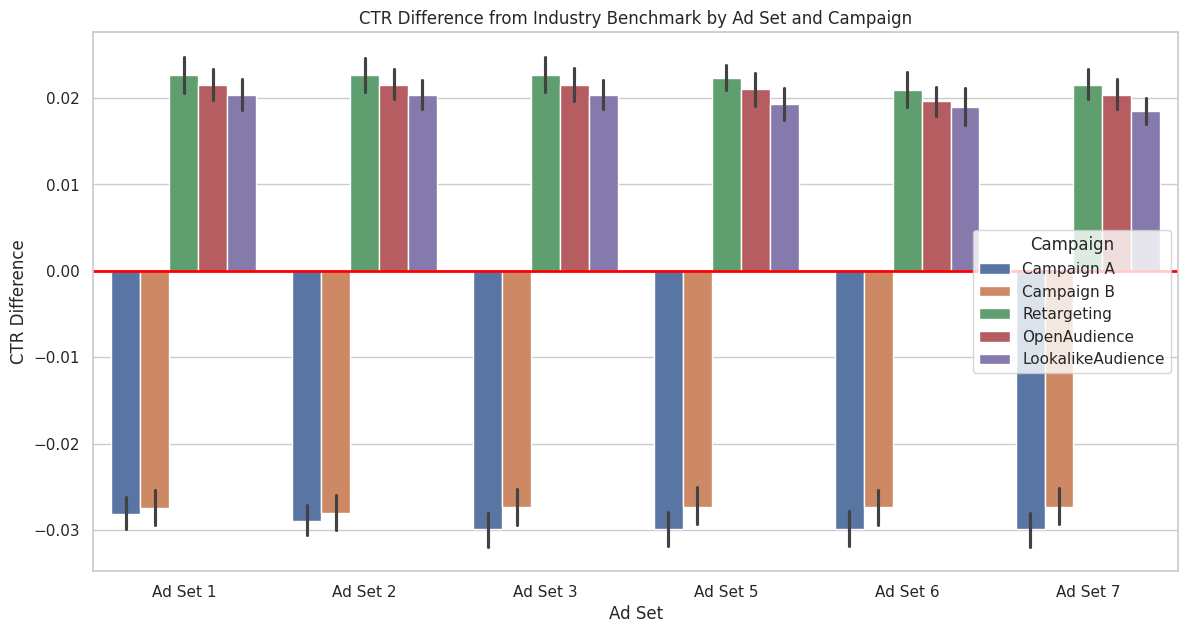

In [23]:
#CTR Difference
plt.figure(figsize=(14, 7))
sns.barplot(data=summary_comparison, x='ad_set_name', y='ctr_diff', hue='campaign_name')
plt.axhline(0, color='red', linewidth=2)
plt.title('CTR Difference from Industry Benchmark by Ad Set and Campaign')
plt.xlabel('Ad Set')
plt.ylabel('CTR Difference')
plt.legend(title='Campaign')
plt.show()


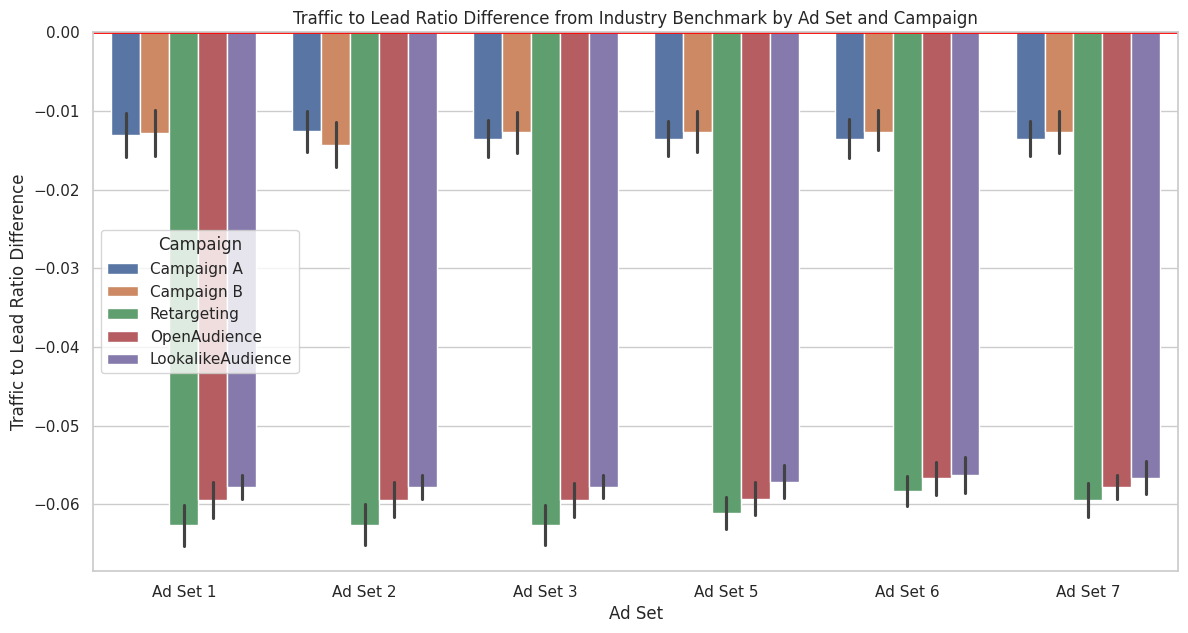

In [24]:

#Traffic to Lead Difference
plt.figure(figsize=(14, 7))
sns.barplot(data=summary_comparison, x='ad_set_name', y='traffic_to_lead_diff', hue='campaign_name')
plt.axhline(0, color='red', linewidth=2)
plt.title('Traffic to Lead Ratio Difference from Industry Benchmark by Ad Set and Campaign')
plt.xlabel('Ad Set')
plt.ylabel('Traffic to Lead Ratio Difference')
plt.legend(title='Campaign')
plt.show()


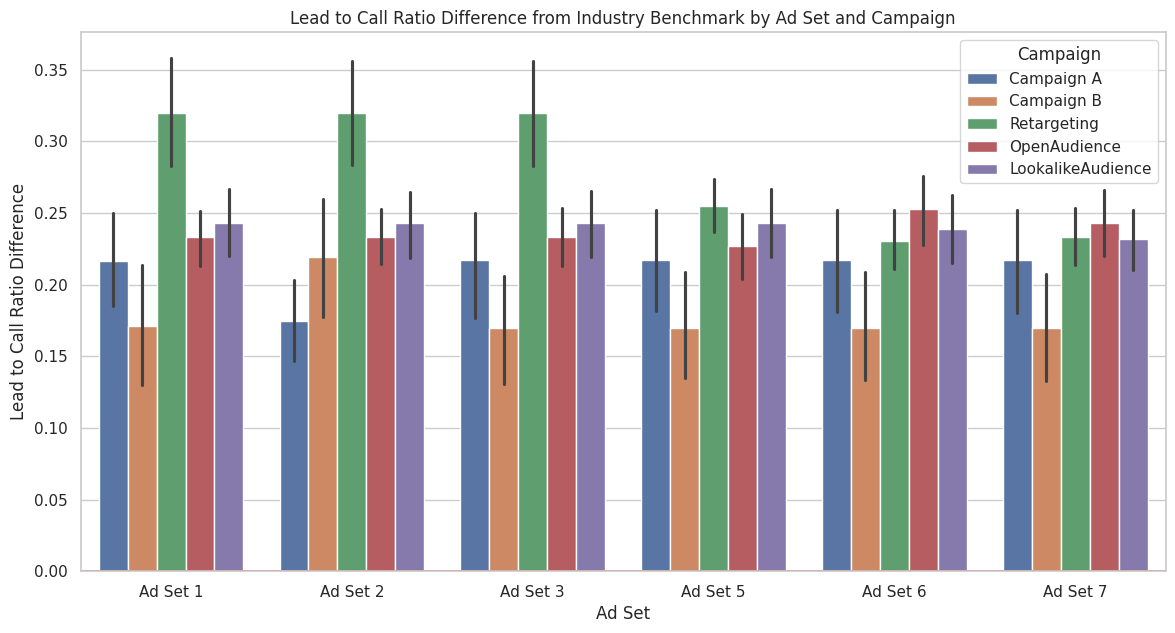

In [25]:

#Lead to Call Difference
plt.figure(figsize=(14, 7))
sns.barplot(data=summary_comparison, x='ad_set_name', y='lead_to_call_diff', hue='campaign_name')
plt.axhline(0, color='red', linewidth=2)
plt.title('Lead to Call Ratio Difference from Industry Benchmark by Ad Set and Campaign')
plt.xlabel('Ad Set')
plt.ylabel('Lead to Call Ratio Difference')
plt.legend(title='Campaign')
plt.show()


In [27]:
def evaluate_performance(df, benchmarks_google, benchmarks_facebook):
    conditions = []

    for index, row in df.iterrows():
        if row['campaign_name'] in google_ads_campaigns:
            conditions.append({
                'ctr_status': 'meets' if benchmarks_google['ctr_min'] <= row['ctr'] <= benchmarks_google['ctr_max'] else ('exceeds' if row['ctr'] > benchmarks_google['ctr_max'] else 'falls short'),
                'traffic_to_lead_status': 'meets' if benchmarks_google['traffic_to_lead_min'] <= row['traffic_to_lead'] <= benchmarks_google['traffic_to_lead_max'] else ('exceeds' if row['traffic_to_lead'] > benchmarks_google['traffic_to_lead_max'] else 'falls short'),
                'lead_to_call_status': 'meets' if benchmarks_google['lead_to_call_min'] <= row['lead_to_call'] <= benchmarks_google['lead_to_call_max'] else ('exceeds' if row['lead_to_call'] > benchmarks_google['lead_to_call_max'] else 'falls short')
            })
        elif row['campaign_name'] in facebook_ads_campaigns:
            conditions.append({
                'ctr_status': 'meets' if benchmarks_facebook['ctr_min'] <= row['ctr'] <= benchmarks_facebook['ctr_max'] else ('exceeds' if row['ctr'] > benchmarks_facebook['ctr_max'] else 'falls short'),
                'traffic_to_lead_status': 'meets' if benchmarks_facebook['traffic_to_lead_min'] <= row['traffic_to_lead'] <= benchmarks_facebook['traffic_to_lead_max'] else ('exceeds' if row['traffic_to_lead'] > benchmarks_facebook['traffic_to_lead_max'] else 'falls short'),
                'lead_to_call_status': 'meets' if benchmarks_facebook['lead_to_call_min'] <= row['lead_to_call'] <= benchmarks_facebook['lead_to_call_max'] else ('exceeds' if row['lead_to_call'] > benchmarks_facebook['lead_to_call_max'] else 'falls short')
            })

    return conditions

# Apply conditions to create status columns
performance_conditions = evaluate_performance(comparison_df, industry_benchmarks_google, industry_benchmarks_facebook)
performance_df = pd.DataFrame(performance_conditions)
comparison_df = pd.concat([comparison_df, performance_df], axis=1)

print("Performance Evaluation with Status Indicators:")
print(comparison_df)


Performance Evaluation with Status Indicators:
          date      campaign_name ad_set_name  cost_(inr)  impressions  \
0   2024-04-01         Campaign A    Ad Set 1     2330.33      18714.0   
1   2024-04-01         Campaign A    Ad Set 2     2297.42      21092.0   
2   2024-04-01         Campaign A    Ad Set 3     2007.78      22655.0   
3   2024-04-01         Campaign A    Ad Set 5     2007.78      22655.0   
4   2024-04-01         Campaign A    Ad Set 6     2007.78      22655.0   
..         ...                ...         ...         ...          ...   
895 2024-04-30  LookalikeAudience    Ad Set 2     1986.59      14885.0   
896 2024-04-30  LookalikeAudience    Ad Set 3     1986.59      14885.0   
897 2024-04-30  LookalikeAudience    Ad Set 5     1609.39      17151.0   
898 2024-04-30  LookalikeAudience    Ad Set 6     1503.99      17958.0   
899 2024-04-30  LookalikeAudience    Ad Set 7     1973.63      14249.0   

     clicks_(traffic)       ctr  cpc_(inr)  leads  cpl_(inr)  ..

In [28]:
summary_status = comparison_df.groupby(['campaign_name', 'ad_set_name'])[['ctr_status', 'traffic_to_lead_status', 'lead_to_call_status']].agg(lambda x: ', '.join(x))

print("Summary of Performance Status:")
print(summary_status)


Summary of Performance Status:
                                                                      ctr_status  \
campaign_name     ad_set_name                                                      
Campaign A        Ad Set 1     falls short, falls short, falls short, falls s...   
                  Ad Set 2     falls short, falls short, falls short, falls s...   
                  Ad Set 3     falls short, falls short, falls short, falls s...   
                  Ad Set 5     falls short, falls short, falls short, falls s...   
                  Ad Set 6     falls short, falls short, falls short, falls s...   
                  Ad Set 7     falls short, falls short, falls short, falls s...   
Campaign B        Ad Set 1     falls short, falls short, falls short, falls s...   
                  Ad Set 2     falls short, falls short, falls short, falls s...   
                  Ad Set 3     falls short, falls short, falls short, falls s...   
                  Ad Set 5     falls short, f

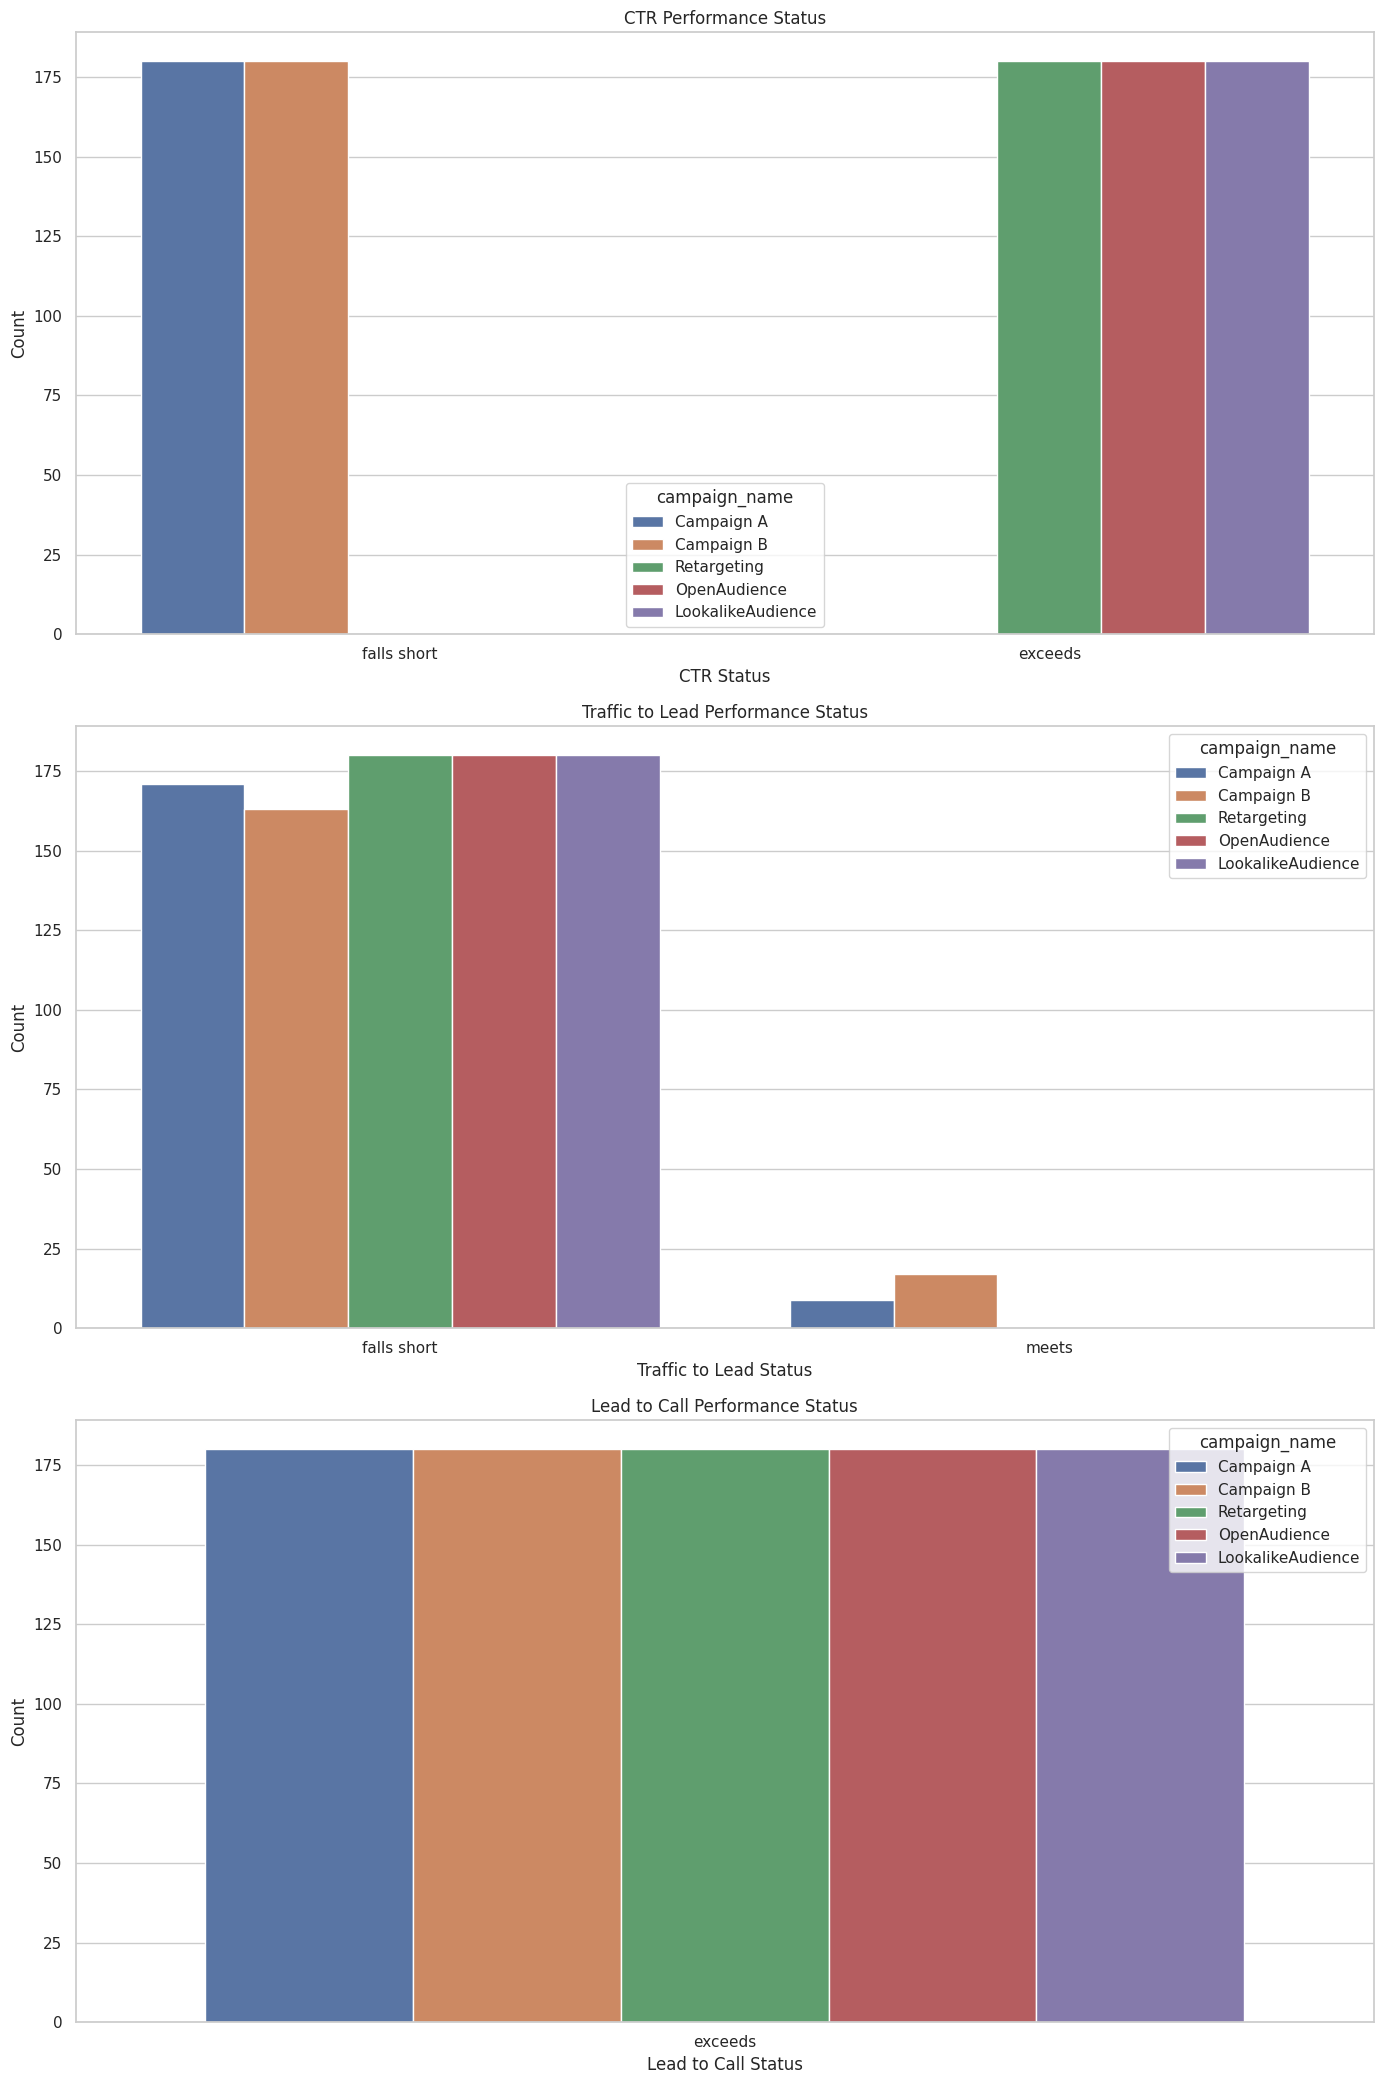

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Create a count plot to show the number of ad sets meeting, exceeding, or falling short for each metric
fig, axes = plt.subplots(3, 1, figsize=(14, 21))

# CTR Status
sns.countplot(data=comparison_df, x='ctr_status', hue='campaign_name', ax=axes[0])
axes[0].set_title('CTR Performance Status')
axes[0].set_xlabel('CTR Status')
axes[0].set_ylabel('Count')

# Traffic to Lead Status
sns.countplot(data=comparison_df, x='traffic_to_lead_status', hue='campaign_name', ax=axes[1])
axes[1].set_title('Traffic to Lead Performance Status')
axes[1].set_xlabel('Traffic to Lead Status')
axes[1].set_ylabel('Count')

# Lead to Call Status
sns.countplot(data=comparison_df, x='lead_to_call_status', hue='campaign_name', ax=axes[2])
axes[2].set_title('Lead to Call Performance Status')
axes[2].set_xlabel('Lead to Call Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [30]:
# Group by campaign and ad set to analyze performance status
performance_summary = comparison_df.groupby(['campaign_name', 'ad_set_name']).agg({
    'ctr_status': 'first',
    'traffic_to_lead_status': 'first',
    'lead_to_call_status': 'first'
})

print("Performance Summary:")
print(performance_summary)


Performance Summary:
                                ctr_status traffic_to_lead_status  \
campaign_name     ad_set_name                                       
Campaign A        Ad Set 1     falls short            falls short   
                  Ad Set 2     falls short            falls short   
                  Ad Set 3     falls short            falls short   
                  Ad Set 5     falls short            falls short   
                  Ad Set 6     falls short            falls short   
                  Ad Set 7     falls short            falls short   
Campaign B        Ad Set 1     falls short            falls short   
                  Ad Set 2     falls short                  meets   
                  Ad Set 3     falls short            falls short   
                  Ad Set 5     falls short            falls short   
                  Ad Set 6     falls short            falls short   
                  Ad Set 7     falls short            falls short   
LookalikeAudi

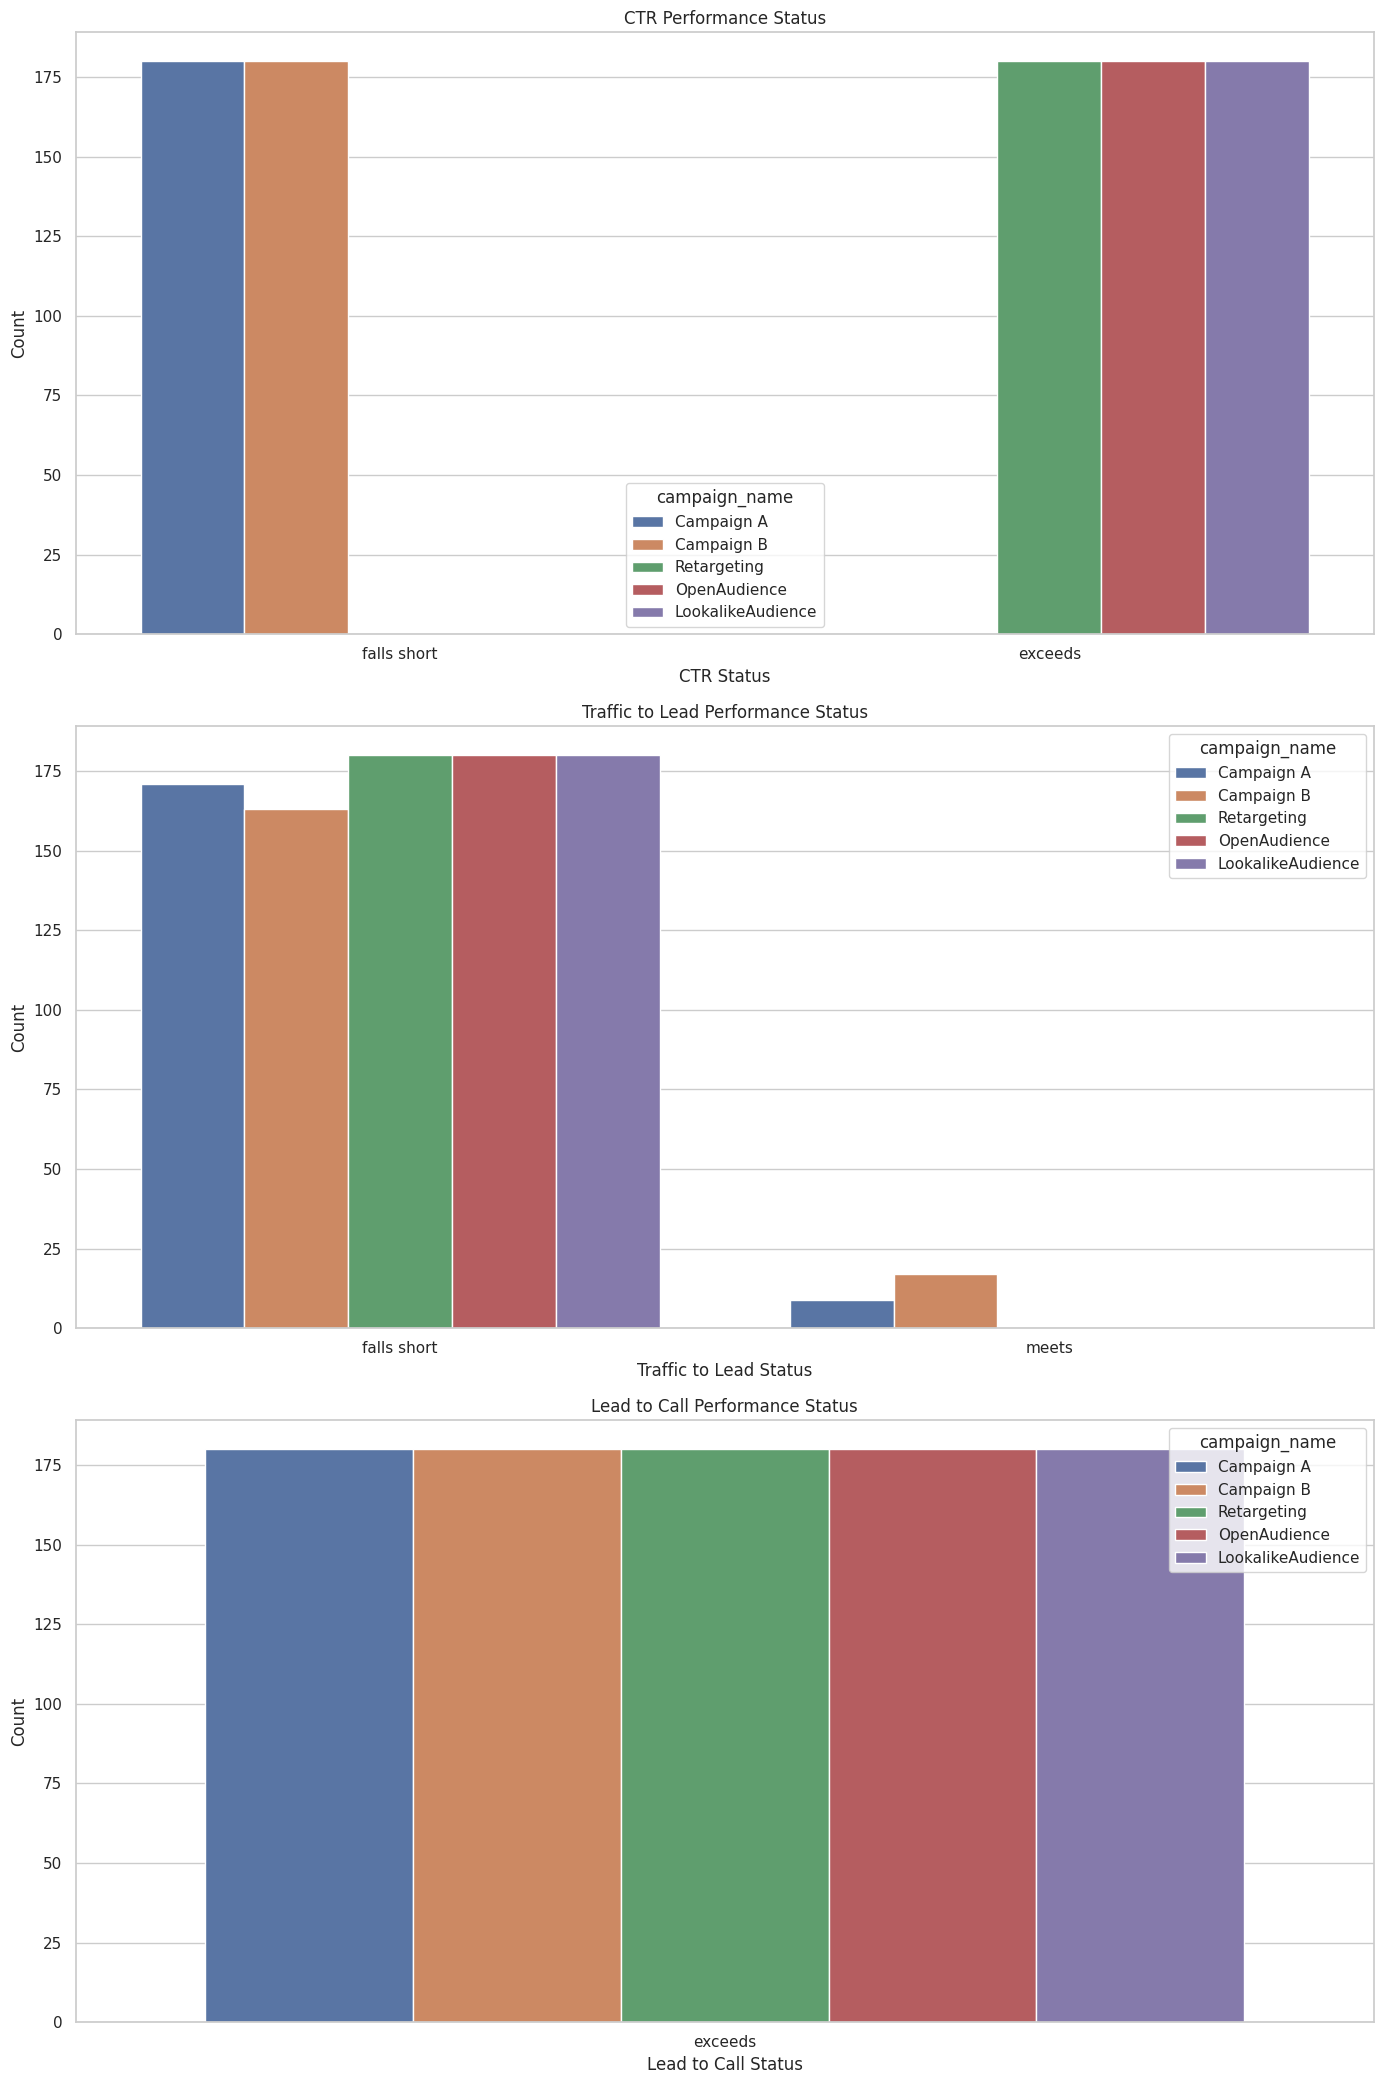

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the visual style
sns.set(style="whitegrid")

# Create a count plot to show the number of ad sets meeting, exceeding, or falling short for each metric
fig, axes = plt.subplots(3, 1, figsize=(14, 21))

# CTR Status
sns.countplot(data=comparison_df, x='ctr_status', hue='campaign_name', ax=axes[0])
axes[0].set_title('CTR Performance Status')
axes[0].set_xlabel('CTR Status')
axes[0].set_ylabel('Count')

# Traffic to Lead Status
sns.countplot(data=comparison_df, x='traffic_to_lead_status', hue='campaign_name', ax=axes[1])
axes[1].set_title('Traffic to Lead Performance Status')
axes[1].set_xlabel('Traffic to Lead Status')
axes[1].set_ylabel('Count')

# Lead to Call Status
sns.countplot(data=comparison_df, x='lead_to_call_status', hue='campaign_name', ax=axes[2])
axes[2].set_title('Lead to Call Performance Status')
axes[2].set_xlabel('Lead to Call Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [32]:
def evaluate_performance_status(row, benchmarks):
    status = {}
    for metric, benchmark_range in benchmarks.items():
        if row[metric] >= benchmark_range[0] and row[metric] <= benchmark_range[1]:
            status[metric] = 'Meets Benchmark'
        elif row[metric] < benchmark_range[0]:
            status[metric] = 'Falls Short of Benchmark'
        else:
            status[metric] = 'Exceeds Benchmark'
    return status

# Define industry benchmarks
industry_benchmarks = {
    'ctr': (0.08, 0.10),  # CTR benchmark range
    'traffic_to_lead': (0.07, 0.08),  # Traffic to lead benchmark range
    'lead_to_call': (0.25, 0.30)  # Lead to call benchmark range
}

# Apply the function to each row to evaluate performance status
comparison_df['performance_status'] = comparison_df.apply(lambda row: evaluate_performance_status(row, industry_benchmarks), axis=1)

# Display the updated DataFrame with performance status
print("Updated DataFrame with Performance Status:")
print(comparison_df)


Updated DataFrame with Performance Status:
          date      campaign_name ad_set_name  cost_(inr)  impressions  \
0   2024-04-01         Campaign A    Ad Set 1     2330.33      18714.0   
1   2024-04-01         Campaign A    Ad Set 2     2297.42      21092.0   
2   2024-04-01         Campaign A    Ad Set 3     2007.78      22655.0   
3   2024-04-01         Campaign A    Ad Set 5     2007.78      22655.0   
4   2024-04-01         Campaign A    Ad Set 6     2007.78      22655.0   
..         ...                ...         ...         ...          ...   
895 2024-04-30  LookalikeAudience    Ad Set 2     1986.59      14885.0   
896 2024-04-30  LookalikeAudience    Ad Set 3     1986.59      14885.0   
897 2024-04-30  LookalikeAudience    Ad Set 5     1609.39      17151.0   
898 2024-04-30  LookalikeAudience    Ad Set 6     1503.99      17958.0   
899 2024-04-30  LookalikeAudience    Ad Set 7     1973.63      14249.0   

     clicks_(traffic)       ctr  cpc_(inr)  leads  cpl_(inr)  ...  \

In [33]:
# Filter ad sets that meet or exceed benchmarks consistently
high_performing_ad_sets = comparison_df[
    (comparison_df['ctr_status'] == 'Meets Benchmark') &
    (comparison_df['traffic_to_lead_status'] == 'Meets Benchmark') &
    (comparison_df['lead_to_call_status'] == 'Meets Benchmark')
]

# Identify campaigns with multiple high-performing ad sets
scaling_opportunities = high_performing_ad_sets.groupby('campaign_name').filter(lambda x: len(x) > 1)['campaign_name'].unique()

print("Campaigns/Ad Sets for Scaling Up:")
print(scaling_opportunities)


Campaigns/Ad Sets for Scaling Up:
[]


In [34]:
# Filter ad sets that consistently fall short of benchmarks
underperforming_ad_sets = comparison_df[
    (comparison_df['ctr_status'] == 'Falls Short of Benchmark') |
    (comparison_df['traffic_to_lead_status'] == 'Falls Short of Benchmark') |
    (comparison_df['lead_to_call_status'] == 'Falls Short of Benchmark')
]

print("Underperforming Campaigns/Ad Sets:")
print(underperforming_ad_sets)
# Analyze potential reasons for underperformance
# For example, insufficient budget, targeting issues, ineffective ad creatives, etc.


Underperforming Campaigns/Ad Sets:
Empty DataFrame
Columns: [date, campaign_name, ad_set_name, cost_(inr), impressions, clicks_(traffic), ctr, cpc_(inr), leads, cpl_(inr), traffic_to_lead, call, lead_to_call, type_of_call_(online), type_of_call_(offline), cac, call_(conversion), ctr_diff, traffic_to_lead_diff, lead_to_call_diff, ctr_status, traffic_to_lead_status, lead_to_call_status, performance_status]
Index: []

[0 rows x 24 columns]


In [35]:
# Filter campaigns or ad sets with consistently poor performance across all metrics
reduced_or_discontinued = comparison_df[
    (comparison_df['ctr_status'] == 'Falls Short of Benchmark') &
    (comparison_df['traffic_to_lead_status'] == 'Falls Short of Benchmark') &
    (comparison_df['lead_to_call_status'] == 'Falls Short of Benchmark')
]

print("Campaigns/Ad Sets to Reduce or Discontinue:")
print(reduced_or_discontinued)
# Consider reallocating budget/resources to higher-performing areas or optimizing strategies for these underperforming areas.


Campaigns/Ad Sets to Reduce or Discontinue:
Empty DataFrame
Columns: [date, campaign_name, ad_set_name, cost_(inr), impressions, clicks_(traffic), ctr, cpc_(inr), leads, cpl_(inr), traffic_to_lead, call, lead_to_call, type_of_call_(online), type_of_call_(offline), cac, call_(conversion), ctr_diff, traffic_to_lead_diff, lead_to_call_diff, ctr_status, traffic_to_lead_status, lead_to_call_status, performance_status]
Index: []

[0 rows x 24 columns]


In [37]:
import pandas as pd

# Sample DataFrame
data = {
    'campaign_name': ['Campaign A', 'Campaign B', 'Campaign A', 'Campaign B'],
    'ad_set_name': ['Ad Set 1', 'Ad Set 2', 'Ad Set 3', 'Ad Set 4'],
    'ctr': [0.05, 0.02, 0.09, 0.03],
    'traffic_to_lead': [0.06, 0.13, 0.07, 0.14],
    'lead_to_call': [0.20, 0.15, 0.25, 0.10],
    'cost_(inr)': [500, 700, 300, 600],
    'date': pd.date_range(start='2024-04-01', periods=4, freq='D')
}

df = pd.DataFrame(data)

# Industry Benchmarks
industry_benchmarks_google = {
    'ctr_min': 0.08, 'ctr_max': 0.10,
    'traffic_to_lead_min': 0.07, 'traffic_to_lead_max': 0.08,
    'lead_to_call_min': 0.25, 'lead_to_call_max': 0.30
}

industry_benchmarks_facebook = {
    'ctr_min': 0.02, 'ctr_max': 0.03,
    'traffic_to_lead_min': 0.12, 'traffic_to_lead_max': 0.15,
    'lead_to_call_min': 0.12, 'lead_to_call_max': 0.15
}

# Function to calculate performance differences for Google Ads
def calculate_performance_diff_google(df):
    df['ctr_diff'] = df['ctr'].apply(lambda x: x - industry_benchmarks_google['ctr_min']
                                     if x < industry_benchmarks_google['ctr_min']
                                     else (x - industry_benchmarks_google['ctr_max']
                                           if x > industry_benchmarks_google['ctr_max'] else 0))
    df['traffic_to_lead_diff'] = df['traffic_to_lead'].apply(lambda x: x - industry_benchmarks_google['traffic_to_lead_min']
                                                             if x < industry_benchmarks_google['traffic_to_lead_min']
                                                             else (x - industry_benchmarks_google['traffic_to_lead_max']
                                                                   if x > industry_benchmarks_google['traffic_to_lead_max'] else 0))
    df['lead_to_call_diff'] = df['lead_to_call'].apply(lambda x: x - industry_benchmarks_google['lead_to_call_min']
                                                       if x < industry_benchmarks_google['lead_to_call_min']
                                                       else (x - industry_benchmarks_google['lead_to_call_max']
                                                             if x > industry_benchmarks_google['lead_to_call_max'] else 0))
    return df

# Apply performance difference calculation for Google Ads
google_df = df[df['campaign_name'].str.contains('Google')]
google_df = calculate_performance_diff_google(google_df)

# Function to calculate performance differences for Facebook Ads
def calculate_performance_diff_facebook(df):
    df['ctr_diff'] = df['ctr'].apply(lambda x: x - industry_benchmarks_facebook['ctr_min']
                                     if x < industry_benchmarks_facebook['ctr_min']
                                     else (x - industry_benchmarks_facebook['ctr_max']
                                           if x > industry_benchmarks_facebook['ctr_max'] else 0))
    df['traffic_to_lead_diff'] = df['traffic_to_lead'].apply(lambda x: x - industry_benchmarks_facebook['traffic_to_lead_min']
                                                             if x < industry_benchmarks_facebook['traffic_to_lead_min']
                                                             else (x - industry_benchmarks_facebook['traffic_to_lead_max']
                                                                   if x > industry_benchmarks_facebook['traffic_to_lead_max'] else 0))
    df['lead_to_call_diff'] = df['lead_to_call'].apply(lambda x: x - industry_benchmarks_facebook['lead_to_call_min']
                                                       if x < industry_benchmarks_facebook['lead_to_call_min']
                                                       else (x - industry_benchmarks_facebook['lead_to_call_max']
                                                             if x > industry_benchmarks_facebook['lead_to_call_max'] else 0))
    return df

# Apply performance difference calculation for Facebook Ads
facebook_df = df[df['campaign_name'].str.contains('Facebook')]
facebook_df = calculate_performance_diff_facebook(facebook_df)

# Generate recommendations
def generate_recommendations(df):
    recommendations = []

    for index, row in df.iterrows():
        rec = {"campaign_name": row['campaign_name'], "ad_set_name": row['ad_set_name'], "recommendations": []}

        if row['ctr_diff'] < 0:
            rec["recommendations"].append("Improve ad copy, test different headlines, use ad extensions, and target more relevant keywords.")
        if row['traffic_to_lead_diff'] < 0:
            rec["recommendations"].append("Refine audience targeting, use more engaging ad creatives, experiment with different ad formats.")
        if row['lead_to_call_diff'] < 0:
            rec["recommendations"].append("Improve follow-up processes, enhance lead nurturing strategies.")

        recommendations.append(rec)

    return recommendations

# Generate recommendations for Google Ads and Facebook Ads
google_recommendations = generate_recommendations(google_df)
facebook_recommendations = generate_recommendations(facebook_df)

# Identify day-wise patterns
def identify_day_wise_patterns(df):
    day_wise_summary = df.groupby(df['date'].dt.day_name()).agg({
        'ctr': ['mean'],
        'traffic_to_lead': ['mean'],
        'lead_to_call': ['mean']
    }).reset_index()
    return day_wise_summary

google_day_wise_patterns = identify_day_wise_patterns(google_df)
facebook_day_wise_patterns = identify_day_wise_patterns(facebook_df)

# Output results
print("Google Ads Recommendations:")
for rec in google_recommendations:
    print(rec)

print("\nFacebook Ads Recommendations:")
for rec in facebook_recommendations:
    print(rec)

print("\nGoogle Ads Day-wise Patterns:")
print(google_day_wise_patterns)

print("\nFacebook Ads Day-wise Patterns:")
print(facebook_day_wise_patterns)


Google Ads Recommendations:

Facebook Ads Recommendations:

Google Ads Day-wise Patterns:
Empty DataFrame
Columns: [(date, ), (ctr, mean), (traffic_to_lead, mean), (lead_to_call, mean)]
Index: []

Facebook Ads Day-wise Patterns:
Empty DataFrame
Columns: [(date, ), (ctr, mean), (traffic_to_lead, mean), (lead_to_call, mean)]
Index: []
